In [7]:
## import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from time import time

In [8]:
run utils.py

In [35]:
a = pd.read_pickle("../Features/Train/betrag_stats.pkl")
b = pd.read_pickle("../Features/Train/betrag_histogram.pkl")
c = pd.read_pickle("../Features/Train/faktor_stats.pkl")
d = pd.read_pickle("../Features/Train/typ_stats.pkl")
e = pd.read_pickle("../Features/Train/nummer_tfidf.pkl")
f = pd.read_pickle("../Features/Train/art_tfidf.pkl")
g = pd.read_pickle("../Features/Train/leistung_tfidf.pkl")
h = pd.read_pickle("../Features/Train/simple_features.pkl")
k = pd.read_pickle("../Features/Train/nummer_kat_tfidf.pkl")

train = a.merge(b, on='ID')
train = train.merge(c, on='ID')
train = train.merge(d, on='ID')
train = train.merge(e, on='ID')
train = train.merge(f, on='ID')
train = train.merge(g, on='ID')
train = train.merge(h, on='ID')
train = train.merge(k, on='ID')

In [36]:
a = pd.read_pickle("../Features/Test/betrag_stats.pkl")
b = pd.read_pickle("../Features/Test/betrag_histogram.pkl")
c = pd.read_pickle("../Features/Test/faktor_stats.pkl")
d = pd.read_pickle("../Features/Test/typ_stats.pkl")
e = pd.read_pickle("../Features/Test/nummer_tfidf.pkl")
f = pd.read_pickle("../Features/Test/art_tfidf.pkl")
g = pd.read_pickle("../Features/Test/leistung_tfidf.pkl")
h = pd.read_pickle("../Features/Test/simple_features.pkl")
k = pd.read_pickle("../Features/Test/nummer_kat_tfidf.pkl")

test = a.merge(b, on='ID')
test = test.merge(c, on='ID')
test = test.merge(d, on='ID')
test = test.merge(e, on='ID')
test = test.merge(f, on='ID')
test = test.merge(g, on='ID')
test = test.merge(h, on='ID')
test = test.merge(k, on='ID')

In [37]:
targets = pd.read_pickle("../Data_original/Targets.pkl")

In [38]:
train = train.merge(targets[['ID', 'target']], on='ID', how='inner')
test = test.merge(targets[['ID', 'target']], on='ID', how='inner')

In [39]:
y_train = train.target.values
y_test = test.target.values

X_train = train.drop(['ID', 'target'], axis=1)
X_test = test.drop(['ID', 'target'], axis=1)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ROC AUC score: 0.9495
PR AUC score: 0.3626
CPU times: user 23min 33s, sys: 21.5 s, total: 23min 54s
Wall time: 1min 39s


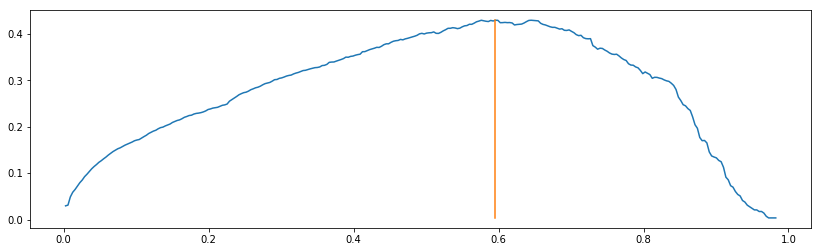

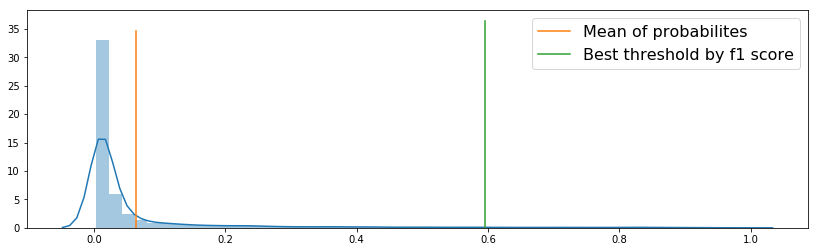

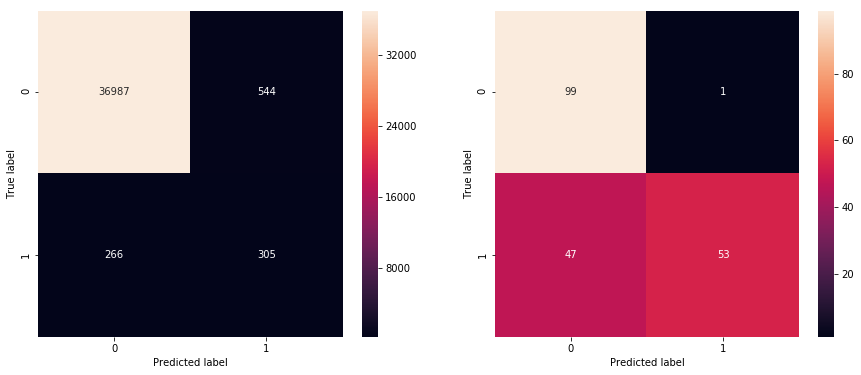

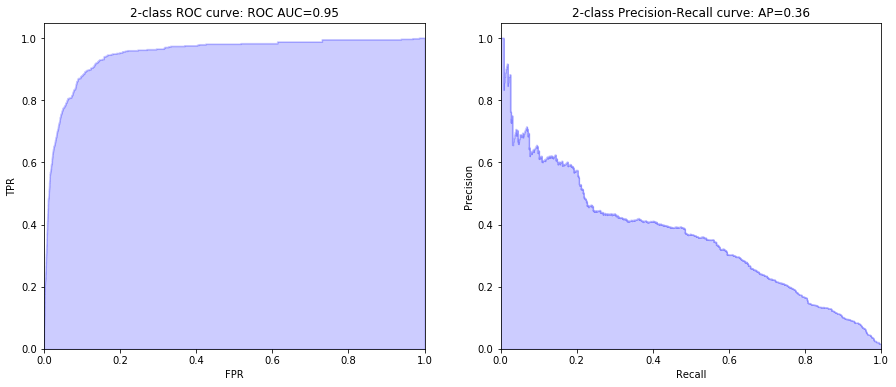

In [40]:
%%time 
model = LGBMClassifier(class_weight={0: y_train.mean(), 1: 1 - y_train.mean()})
model.fit(X_train, y_train)

prediction_proba = model.predict_proba(X_test)
prediction = prediction_proba[:, 1] > get_threshold_by_f1(prediction_proba, y_test, plot=True)
plot_probas(prediction_proba, y_test)

get_roc_auc_score(prediction_proba, y_test)
get_pr_auc_score(prediction_proba, y_test)

plot_confusion_matrix(prediction, y_test)
plot_curves(prediction_proba, y_test)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ROC AUC score: 0.9288
PR AUC score: 0.3038
CPU times: user 29min 47s, sys: 18.3 s, total: 30min 5s
Wall time: 1min 54s


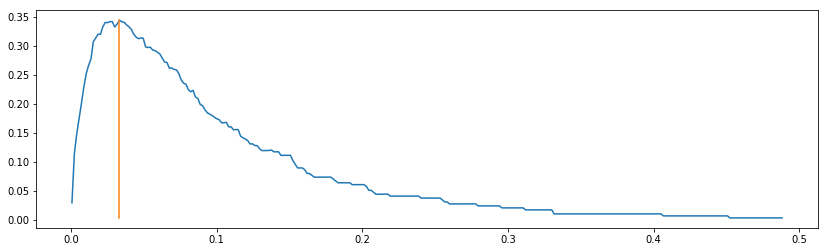

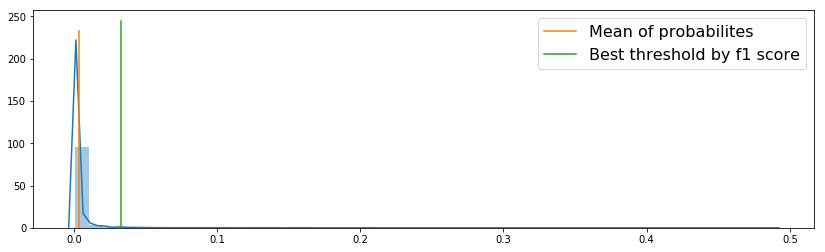

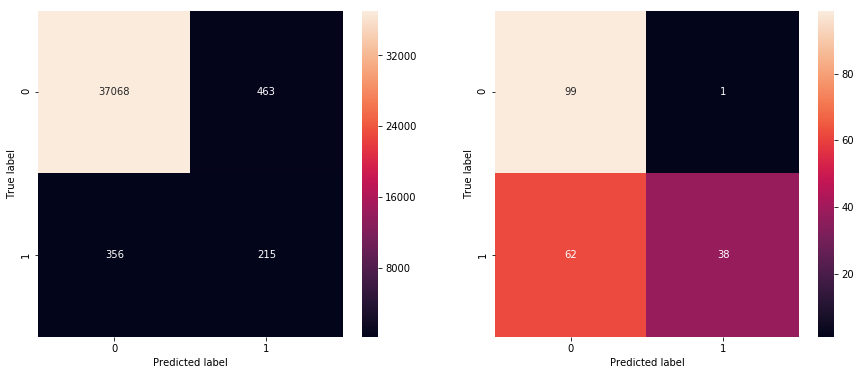

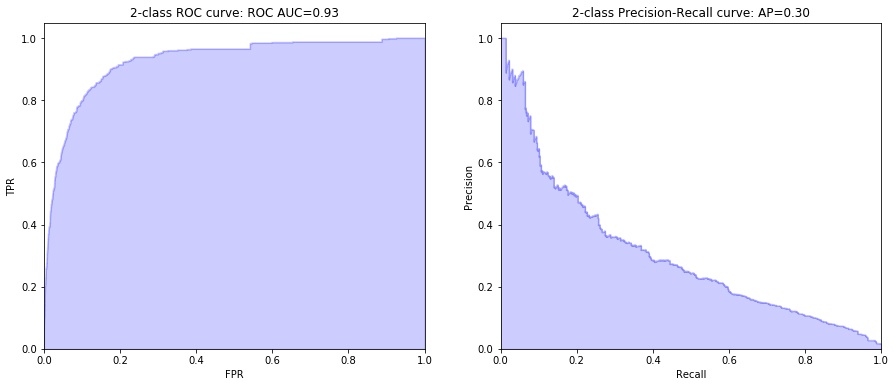

In [41]:
%%time 
model = XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)

prediction_proba = model.predict_proba(X_test)
prediction = prediction_proba[:, 1] > get_threshold_by_f1(prediction_proba, y_test, plot=True)
plot_probas(prediction_proba, y_test)

get_roc_auc_score(prediction_proba, y_test)
get_pr_auc_score(prediction_proba, y_test)

plot_confusion_matrix(prediction, y_test)
plot_curves(prediction_proba, y_test)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ROC AUC score: 0.9361
PR AUC score: 0.4059
CPU times: user 1h 36min 45s, sys: 53.3 s, total: 1h 37min 39s
Wall time: 7min 58s


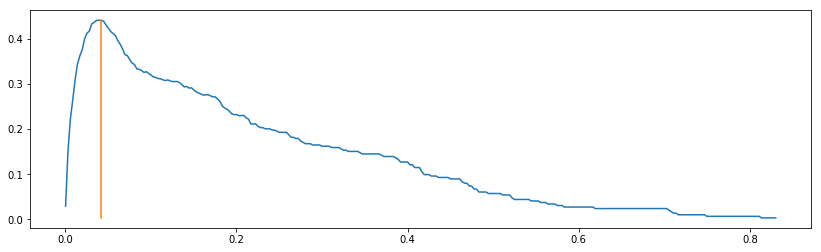

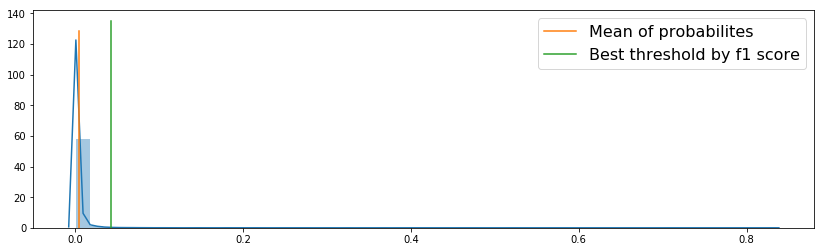

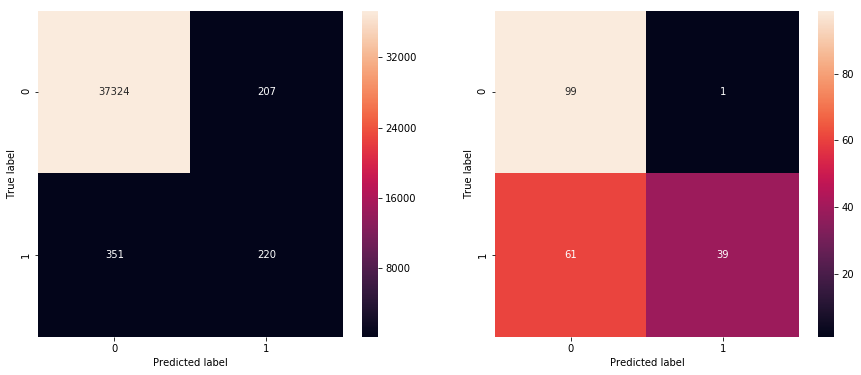

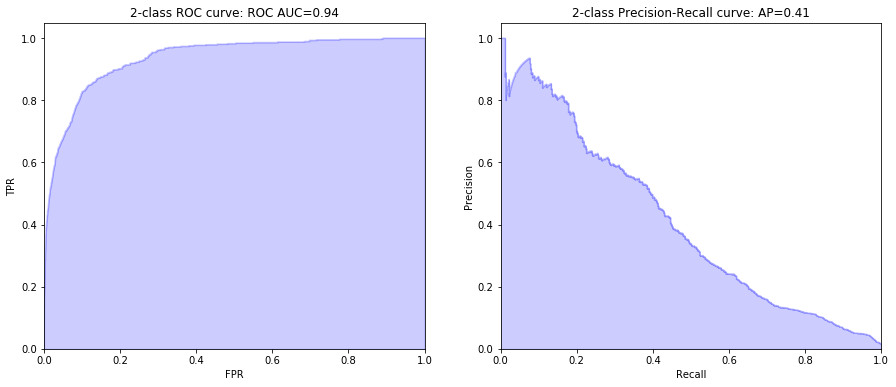

In [42]:
%%time 
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)

prediction_proba = model.predict_proba(X_test)
prediction = prediction_proba[:, 1] > get_threshold_by_f1(prediction_proba, y_test, plot=True)
plot_probas(prediction_proba, y_test)

get_roc_auc_score(prediction_proba, y_test)
get_pr_auc_score(prediction_proba, y_test)

plot_confusion_matrix(prediction, y_test)
plot_curves(prediction_proba, y_test)

In [26]:
pd.read_pickle("../Datasets/TransformedData.pkl")

,ID,RECHNUNGSBETRAG,ALTER,GESCHLECHT,VERSICHERUNG,target,BETRAG_mean,BETRAG_std,BETRAG_min,BETRAG_max,...,B_1,B_11,B_13,B_14,B_2,B_3,B_4,B_6,B_8,B_9
0,ID_1,330.970001,53.570385,0,1,0,3.377132,0.000000,3.377132,3.377132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_2,455.200012,83.382721,1,1,0,3.195991,0.430260,2.838298,4.058487,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ID_3,199.529999,69.567513,1,1,0,3.398502,0.243947,3.048167,3.651610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_4,142.850006,69.556328,1,1,0,3.345838,0.208895,3.058081,3.508755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_5,168.869995,18.873434,0,1,0,3.078942,0.087132,3.017331,3.140554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ID_6,113.660004,77.866142,0,1,0,3.537864,0.444367,3.239724,4.048591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ID_7,2775.209961,77.866142,0,1,0,4.392152,0.696425,3.325276,4.978915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ID_8,41.770000,66.947693,1,1,0,2.878449,0.000000,2.878449,2.878449,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,ID_9,70.629997,30.238573,0,1,0,3.521841,0.000000,3.521841,3.521841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ID_10,104.900002,52.904442,0,1,0,3.296324,0.304834,2.949514,3.521841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
